# Compare duplicate observations

In [114]:
from astropy.io import fits
from matplotlib import pyplot as plt
from astropy.table import Table
import os
import numpy as np
from scipy.stats import median_absolute_deviation as MAD

In [50]:
import collections


In [81]:
homedir = os.getenv("HOME")
tabledir = homedir+"/research/Virgo/halpha-tables/"

In [151]:
#dtab = Table.read(os.path.join(tabledir,"halphagui-output-combined-2023-Aug-24.fits"))
dtab = Table.read(os.path.join(tabledir,"halphagui-output-combined-2023-Aug-26.fits"))
print(len(dtab))

864


In [152]:
goodarea = dtab['ELLIP_UNMASKED_AREA']/dtab['ELLIP_TOTAL_AREA']
goodflag = (dtab['ELLIP_HRA'] > 0) & (dtab['HM16'] > 0) & (dtab['FILT_COR']< 3.) & (goodarea > 0.5) & (dtab['M25'] > 0)
# these are likely halpha detections
htab = dtab[goodflag]
print(np.sum(goodflag))


653


/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


In [153]:

duplist2 = ([item for item, count in collections.Counter(dtab['VFID']).items() if (count > 1)])
duplist3 = ([item for item, count in collections.Counter(dtab['VFID']).items() if count > 2])


hduplist2 = ([item for item, count in collections.Counter(htab['VFID']).items() if (count > 1)])
hduplist3 = ([item for item, count in collections.Counter(htab['VFID']).items() if count > 2])

In [154]:
print("number w/2 and 3 observations: ",len(duplist2),len(duplist3))
print("number of ha w/2 and 3 observations: ",len(hduplist2),len(hduplist3))

number w/2 and 3 observations:  159 23
number of ha w/2 and 3 observations:  103 12


In [128]:
print("number w/2 and 3 observations: ",len(duplist2),len(duplist3))
print("number of ha w/2 and 3 observations: ",len(hduplist2),len(hduplist3))

number w/2 and 3 observations:  211 71
number of ha w/2 and 3 observations:  113 23


/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:2786: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


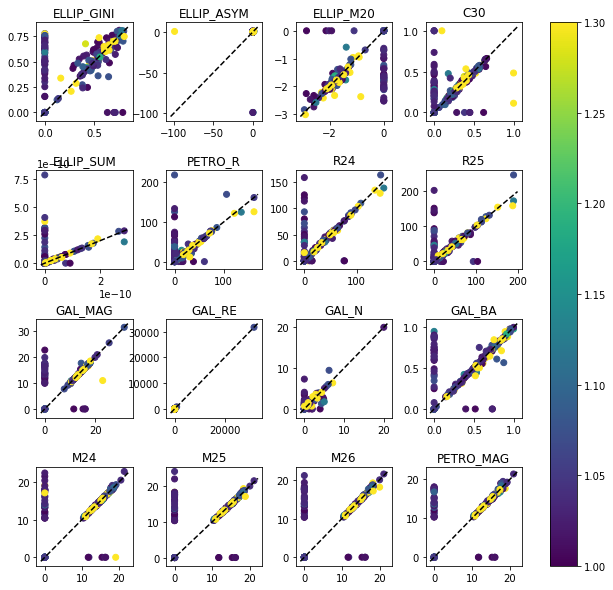

In [131]:
cols = ['ELLIP_GINI','ELLIP_ASYM','ELLIP_M20','C30',\
        'ELLIP_SUM','PETRO_R','R24','R25',\
        'GAL_MAG','GAL_RE','GAL_N','GAL_BA',\
        'M24','M25','M26','PETRO_MAG']
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.5,wspace=.35)
nplot = 1
allax = []
for c in cols:
    x1 = []
    x2 = []
    filtcor = []
    for vfid in duplist2:
        flag = dtab['VFID'] == vfid
        if np.sum(flag) > 1:
            index = np.arange(len(dtab))[flag]
            #print(dtab['VFID'][index])
            x1.append(dtab[c][index[0]])
            x2.append(dtab[c][index[1]])
            filtcor.append(np.max(dtab['FILT_COR'][index]))
    plt.subplot(4,4,nplot)
    plt.scatter(x1,x2,c=filtcor,vmin=1,vmax=1.3)

    xmin,xmax = plt.xlim()
    xline = np.linspace(xmin,xmax,100)
    plt.plot(xline,xline,'k--')
    plt.title(c)
    nplot += 1
    allax.append(plt.gca())
plt.colorbar(ax=allax, fraction=0.08)

/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:2786: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


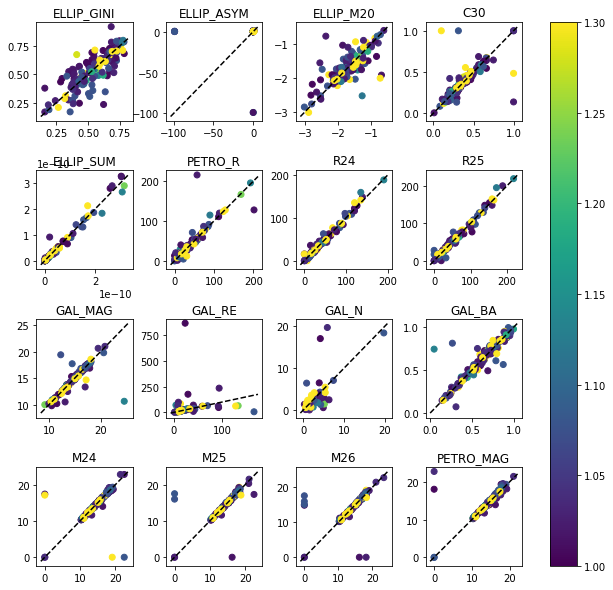

In [155]:
cols = ['ELLIP_GINI','ELLIP_ASYM','ELLIP_M20','C30',\
        'ELLIP_SUM','PETRO_R','R24','R25',\
        'GAL_MAG','GAL_RE','GAL_N','GAL_BA',\
        'M24','M25','M26','PETRO_MAG']
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.5,wspace=.35)
nplot = 1
allax = []
for c in cols:
    x1 = []
    x2 = []
    filtcor = []
    for vfid in duplist2:
        flag = dtab['VFID'] == vfid
        if np.sum(flag) > 1:
            index = np.arange(len(dtab))[flag]
            #print(dtab['VFID'][index])
            x1.append(dtab[c][index[0]])
            x2.append(dtab[c][index[1]])
            filtcor.append(np.max(dtab['FILT_COR'][index]))
    plt.subplot(4,4,nplot)
    plt.scatter(x1,x2,c=filtcor,vmin=1,vmax=1.3)

    xmin,xmax = plt.xlim()
    xline = np.linspace(xmin,xmax,100)
    plt.plot(xline,xline,'k--')
    plt.title(c)
    nplot += 1
    allax.append(plt.gca())
plt.colorbar(ax=allax, fraction=0.08)

# R-band measurements for "Halpha" sample

/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:2786: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


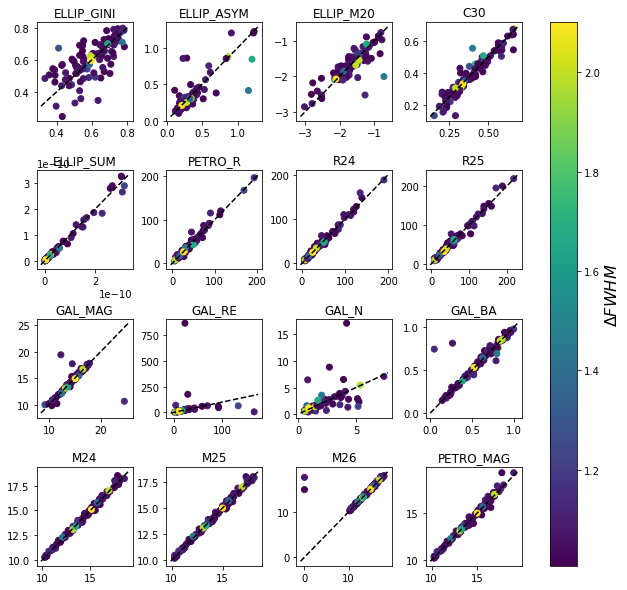

In [161]:
cols = ['ELLIP_GINI','ELLIP_ASYM','ELLIP_M20','C30',\
        'ELLIP_SUM','PETRO_R','R24','R25',\
        'GAL_MAG','GAL_RE','GAL_N','GAL_BA',\
        'M24','M25','M26','PETRO_MAG']
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.5,wspace=.35)
nplot = 1
allax = []
for c in cols:
    x1 = []
    x2 = []
    filtcor = []
    for vfid in hduplist2:
        flag = htab['VFID'] == vfid
        if np.sum(flag) > 1:
            index = np.arange(len(htab))[flag]
            #print(dtab['VFID'][index])
            if ('ASYM' in c) & ((htab['ELLIP_ASYM'][index[0]] < 0) |(htab['ELLIP_ASYM'][index[1]] < 0)) :
                continue
            x1.append(htab[c][index[0]])
            x2.append(htab[c][index[1]])
            filtcor.append(np.max(htab['FILT_COR'][index]))
            #filtcor.append(np.abs(htab['R_FWHM'][index[0]] -htab['R_FWHM'][index[1]]))
    plt.subplot(4,4,nplot)
    plt.scatter(x1,x2,c=filtcor)#,vmin=1,vmax=1.3)

    xmin,xmax = plt.xlim()
    xline = np.linspace(xmin,xmax,100)
    plt.plot(xline,xline,'k--')
    plt.title(c)
    nplot += 1
    allax.append(plt.gca())
cb = plt.colorbar(ax=allax, fraction=0.08)
#cb.set_label("Mag_SB25",size=16)
cb.set_label(r"$\Delta FWHM$",size=16)

/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:2786: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


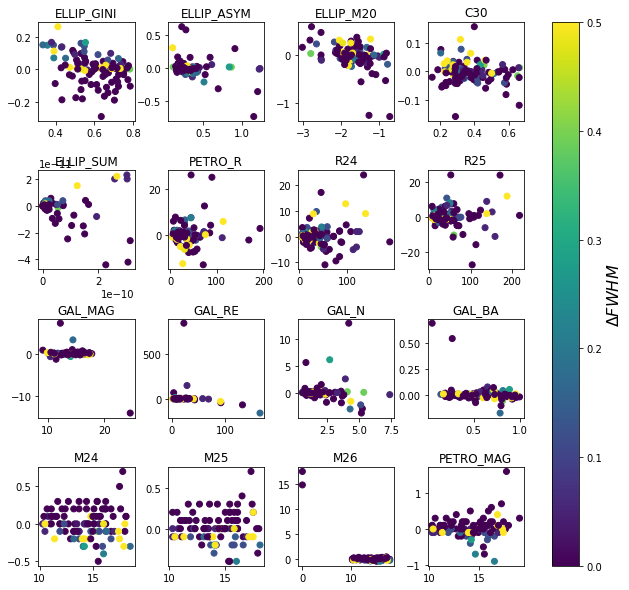

In [158]:
cols = ['ELLIP_GINI','ELLIP_ASYM','ELLIP_M20','C30',\
        'ELLIP_SUM','PETRO_R','R24','R25',\
        'GAL_MAG','GAL_RE','GAL_N','GAL_BA',\
        'M24','M25','M26','PETRO_MAG']
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.5,wspace=.35)
nplot = 1
allax = []
for c in cols:
    x1 = []
    x2 = []
    color = []
    dx = []
    for vfid in hduplist2:
        flag = htab['VFID'] == vfid
        if np.sum(flag) > 1:
            index = np.arange(len(htab))[flag]
            #print(dtab['VFID'][index])
            if ('ASYM' in c) & ((htab['ELLIP_ASYM'][index[0]] < 0) |(htab['ELLIP_ASYM'][index[1]] < 0)) :
                continue
            x1.append(htab[c][index[0]])
            x2.append(htab[c][index[1]])
            color.append(htab['R_FWHM'][index[0]]-htab['R_FWHM'][index[1]])
            dx.append(htab[c][index[1]]-htab[c][index[0]])
            #filtcor.append(np.abs(htab['R_FWHM'][index[0]] -htab['R_FWHM'][index[1]]))
    plt.subplot(4,4,nplot)
    #plt.scatter(x1,x2,c=filtcor)#,vmin=1,vmax=1.3)
    plt.scatter(x1,dx,c=color,vmin=0,vmax=.5)

    xmin,xmax = plt.xlim()
    #xline = np.linspace(xmin,xmax,100)
    #plt.plot(xline,xline,'k--')
    plt.title(c)
    nplot += 1
    allax.append(plt.gca())
cb = plt.colorbar(ax=allax, fraction=0.08)
#cb.set_label("Mag_SB25",size=16)
cb.set_label(r"$\Delta FWHM$",size=16)

ELLIP_HGINI: MED/MAD = 0.02,0.12
ELLIP_HASYM: MED/MAD = -0.10,0.66
ELLIP_HM20: MED/MAD = -0.04,nan
HC30: MED/MAD = 0.00,0.08
ELLIP_HSUM: MED/MAD = 0.00,0.00
HPETRO_R: MED/MAD = 0.55,8.08


/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:138: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


HR16: MED/MAD = 0.00,5.63
HR17: MED/MAD = 0.00,5.93
HM16: MED/MAD = -0.10,1.04
HM17: MED/MAD = -0.10,1.04
HF_TOT: MED/MAD = 0.00,0.00
HPETRO_MAG: MED/MAD = 0.00,nan


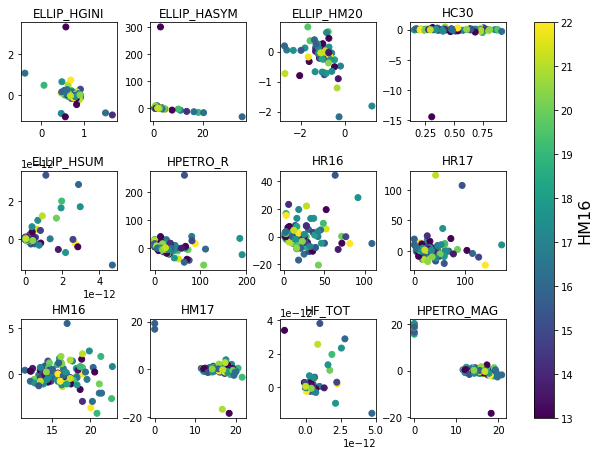

In [159]:
cols = ['ELLIP_HGINI','ELLIP_HASYM','ELLIP_HM20','HC30',\
        'ELLIP_HSUM','HPETRO_R','HR16','HR17',\
        'HM16','HM17','HF_TOT','HPETRO_MAG']
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.5,wspace=.35)
nplot = 1
allax = []
for i,c in enumerate(cols):
    x1 = []
    x2 = []
    dx = []
    color = []
    for vfid in hduplist2:
        flag = htab['VFID'] == vfid
        
        if np.sum(flag) > 1:
            index = np.arange(len(htab))[flag]
            if ('ASYM' in c) & ((htab['ELLIP_HASYM'][index[0]] < 0) |(htab['ELLIP_HASYM'][index[1]] < 0)) :
                continue
            
            #print(dtab['VFID'][index])
            x1.append(htab[c][index[0]])
            x2.append(htab[c][index[1]])
            dx.append(htab[c][index[1]]-htab[c][index[0]])
            color.append(np.max(dtab['HM16'][index]))
            #color.append(np.max(htab['FILT_COR'][index]))
        
    plt.subplot(4,4,nplot)
    #plt.scatter(x1,x2,c=color,vmin=1,vmax=1.3)
    #plt.scatter(x1,x2,c=color,vmin=13,vmax=22)
    plt.scatter(x1,dx,c=color,vmin=13,vmax=22)
    #if nplot == 1:
    #    plt.axis([0.4,1.2,0.4,1.2])
    xmin,xmax = plt.xlim()
    #plt.ylim(0,2)
    #xline = np.linspace(xmin,xmax,100)
    #plt.plot(xline,xline,'k--')
    plt.title(c)
    nplot += 1
    allax.append(plt.gca())
    print(f"{c}: MED/MAD = {np.nanmedian(dx):.2f},{MAD(dx):.2f}")
cb = plt.colorbar(ax=allax, fraction=0.08)
cb.set_label(label="HM16",size=16)

(array([247.,   0.,   0.,  95.,   0.,   0., 237.,   0.,   0.,  74.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

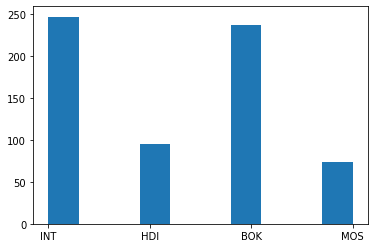

In [160]:
plt.hist(htab['TEL'])